Kaggle地址:https://www.kaggle.com/blastchar/telco-customer-churn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 设置显示所有的列
pd.options.display.max_columns = None

### 读取数据

In [8]:
# %cd Kaggle/Telco-Customer-Churn/
# %cd Kaggle/Telco-Customer-Churn/
%pwd

'D:\\Documents\\MyProjects\\DataAnalysis\\Kaggle\\Telco-Customer-Churn'

In [9]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.shape

(7043, 21)

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 处理缺失值

In [11]:
data.info()
# data.isnull().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


上面看起来没有缺失值，但是TotalCharges这个特征是object而不是float，需要检查

In [12]:
# 注意TotalCharges这个特征是字符类型，需要转成float
# 但是转换的时候会报错，需要检查
# data['TotalCharges'].astype(np.float)
data['TotalCharges'][:489]

0        29.85
1       1889.5
2       108.15
3      1840.75
4       151.65
        ...   
484     680.05
485    6130.85
486       1415
487    6201.95
488           
Name: TotalCharges, Length: 489, dtype: object

totalcharges的第489个值是空的，但是并没有显示为null，实际上这是一个空格，长度为1

In [13]:
data['TotalCharges'][:489].apply(len)

0      5
1      6
2      6
3      7
4      6
      ..
484    6
485    7
486    4
487    7
488    1
Name: TotalCharges, Length: 489, dtype: int64

可以通过字符串的`strip`方法去除掉

In [14]:
t = data['TotalCharges'][:489].str.strip()
t.apply(len)

0      5
1      6
2      6
3      7
4      6
      ..
484    6
485    7
486    4
487    7
488    0
Name: TotalCharges, Length: 489, dtype: int64

In [15]:
# 去除掉空格然后再检查是否有缺失值
data['TotalCharges'] = data['TotalCharges'].str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


遗憾的是，去掉空格后，这个长度为空的字符串仍然不能被识别为null，需要手动处理.

首先要找出有多少个这样的空值

In [16]:
t = data['TotalCharges'].str.strip().apply(len)
sum(t == 0)

11

然后手动将这些缺失值标记为nan

In [17]:
data.loc[ t==0,'TotalCharges'] = np.nan

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# 先转成float，再用均值填充
data['TotalCharges'] = data['TotalCharges'].astype(np.float)
totalcharges_fill = data['TotalCharges'].mean()
data['TotalCharges'].fillna(value=totalcharges_fill, inplace=True)

In [20]:
# 然后再检查缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
data.describe([0.01, 0.25, 0.5, 0.75, 0.9, 1]).T

,count,mean,std,min,1%,25%,50%,75%,90%,100%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.000,0.00,0.00,1.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,1.0,9.000,29.00,55.00,69.00,72.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.2,35.500,70.35,89.85,102.60,118.75,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,19.9,402.225,1400.55,3786.60,5973.69,8684.80,8684.80


### EDA

In [40]:
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

检查类别的平衡

In [37]:
print(type(data['Churn'].value_counts()))
data['Churn'].value_counts()

<class 'pandas.core.series.Series'>


No     5174
Yes    1869
Name: Churn, dtype: int64

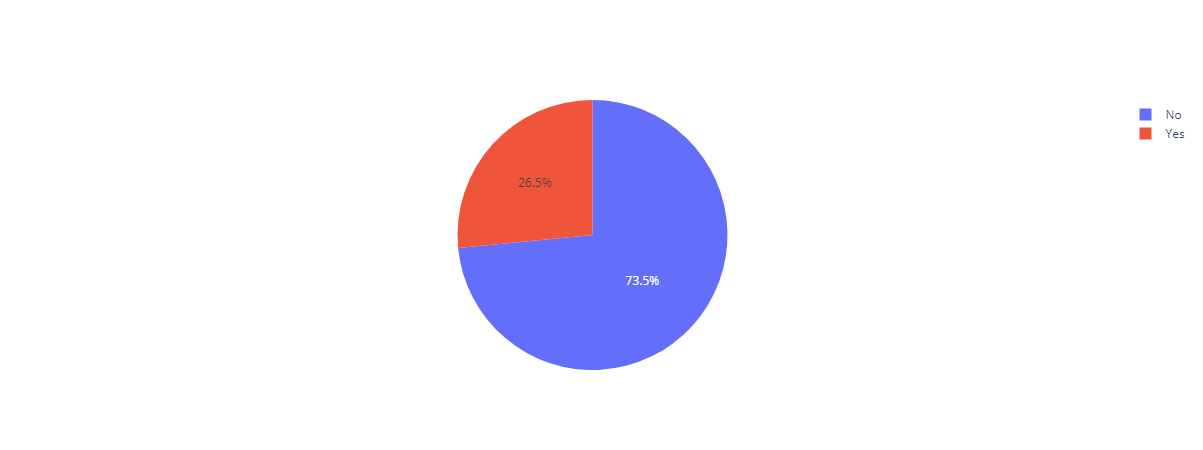

In [41]:
cls = data['Churn'].value_counts()
# px.pie(data_frame=cls, values=cls, names=cls.index, title="类别Churn的分布")
trace = go.Pie(labels=cls.index, values=cls)
fig  = go.Figure(trace)
fig.show()

### 特征处理

检查分类变量的特征取值都有哪些以及取值个数

In [20]:
# str_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','DeviceProtection'
#                ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']
# 选择需要进行哑编码的列
features = list(data.columns)
#  注意，那些本来就是数值的列如果不排除的话，也会被get_dummies当做分类变量看待，所以需要排除
features_dummy = [ele for ele in features if ele not in ['customerID', 'SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']]

# data[columns_dummy].apply(pd.Series.value_counts).fillna("")
data[features_dummy].apply(pd.Series.value_counts).count()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

In [21]:
feature_value_counts = data[features_dummy].apply(pd.Series.value_counts).count()
feature_value_counts[feature_value_counts > 2].index

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [22]:
# 对于取值为两个的特征，进行独热编码时去掉第一个level，减少特征数量
features_binary = list(feature_value_counts[feature_value_counts == 2].index)
data_dummy = pd.get_dummies(data, columns=features_binary, drop_first=True)

# 这里不会增加特征数，因为二元取值的特征独热编码后去掉了一个level
data_dummy.shape

(7043, 21)

In [25]:
data_dummy.head()

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,7590-VHVEG,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,0,1,0,0,1
1,5575-GNVDE,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,No,1,0,0,1,0
2,3668-QPYBK,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,1,0,0,1,1
3,7795-CFOCW,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
4,9237-HQITU,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0,0,0,1,1


In [26]:
# 对于取值为两个以上的特征，进行独热编码时，不去掉第一个level
features_triple = list(feature_value_counts[feature_value_counts > 2].index)
data_dummy = pd.get_dummies(data_dummy, columns=features_triple)
data_dummy.shape

(7043, 42)

In [29]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Churn                                    7043 non-null   object 
 6   gender_Male                              7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_Yes                           7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  PaperlessBilling_Yes                     7043 no

In [30]:
data_dummy.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [31]:
# 还差最后一步，需要将目标变量 Churn 从字符串转成 0-1
# 这里使用LabelBinarizer实现
from sklearn.preprocessing import LabelBinarizer
y = ['yes','no','yes','no','no']
lb = LabelBinarizer()
lb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [32]:
lb.classes_

array(['no', 'yes'], dtype='<U3')

In [33]:
lb.transform(y)

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [34]:
# 但是要注意，如果是多分类，就会返回一个矩阵
lb.fit(['a','a','b','c'])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [35]:
lb.classes_

array(['a', 'b', 'c'], dtype='<U1')

In [36]:
lb.transform(['a','b','c','c'])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [37]:
y = data_dummy['Churn'].copy()
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [38]:
lb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [39]:
lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [40]:
lb.transform(y)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [41]:
data_dummy['Churn'] = lb.transform(y)

In [42]:
data_dummy.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


### 建模

In [43]:
# 把目标变量和特征分离开来
#  这里特征矩阵X里，去掉了客户ID，因为我觉得这个特征没有用
X = data_dummy.drop(['Churn', 'customerID'], axis=1)
y = data_dummy['Churn']

In [44]:
X.shape

(7043, 40)

In [45]:
y.shape

(7043,)

In [46]:
# 分割训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state = 29)

In [47]:
Xtrain.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
451,1,22,69.75,1545.40,0,0,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1
2863,0,1,44.60,44.60,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3868,0,21,74.05,1565.70,0,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3650,1,71,24.65,1766.75,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
6879,0,21,86.05,1818.90,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0


使用xgboost模型

In [48]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50)
xgbc.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
xgbc.score(Xtrain,Ytrain)

0.8194726166328601

In [50]:
xgbc.score(Xtest,Ytest)

0.7950780880265026

In [51]:
from sklearn.metrics import accuracy_score
Ypred = xgbc.predict(Xtest)
accuracy_score(Ytest, Ypred)

0.7950780880265026

绘制n_estimators的学习曲线

In [52]:
test_score = []
train_score = []
n_estimators_range = np.arange(30,200,10)
for n_estimator in n_estimators_range:
    xgbc = XGBClassifier(n_estimators=n_estimator)
    xgbc.fit(Xtrain, Ytrain)
    train_score.append(xgbc.score(Xtrain,Ytrain))
    test_score.append(xgbc.score(Xtest,Ytest))

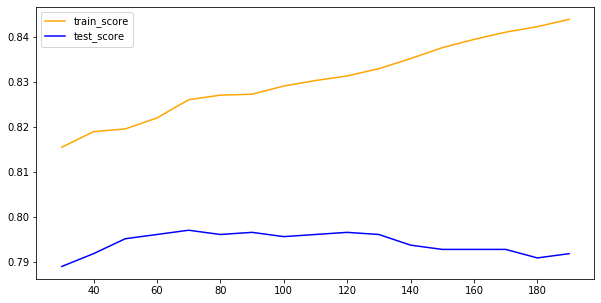

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(n_estimators_range, train_score, color='orange', label='train_score')
ax.plot(n_estimators_range, test_score, color='blue', label='test_score')
plt.legend(loc='best')

In [55]:
from sklearn.model_selection import cross_val_score
cv_score = []
n_estimators_range = np.arange(30,200,10)
for n_estimator in n_estimators_range:
    xgbc = XGBClassifier(n_estimators=n_estimator)
    cv_score.append(cross_val_score(xgbc, X, y, cv=5, n_jobs= -1).mean())

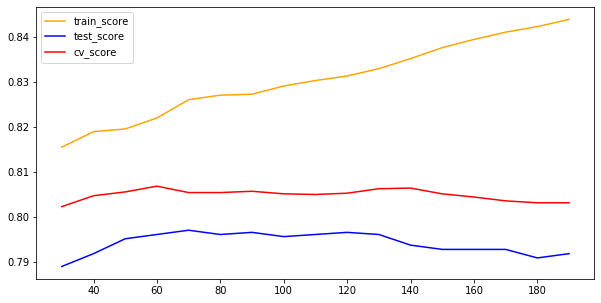

In [56]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(n_estimators_range, train_score, color='orange', label='train_score')
ax.plot(n_estimators_range, test_score, color='blue', label='test_score')
ax.plot(n_estimators_range, cv_score, color='red', label='cv_score')
plt.legend(loc='best')

根据上面绘制的学习曲线，选择n_estimator=70